# **自然言語・可視化・分析ライブラリ：txtデータ用**
テキスト分析を行うためのライブラリです。\
自然言語分析は、まず文書を語彙に分解し、その後 語彙数や語彙の出現傾向を可視化するなどして文書全体の訴えや傾向を把握します。\
このライブラリは、分析したい文書を保存した「txtファイル」を読込むだけで、自動で前処理、以下の可視化を行うライブラリです。
- **nlplot**（自然言語可視化・分析ライブラリ）：ワードカウントグラフや共起ネットワーク等の可視化や分析を行います。文書の語彙の特徴や傾向を掴むことができます。
- **Word Cloud**：出現頻度が高い語を複数選び出し、その頻度に応じた大きさで図示します。文書に含まれる語がどれだけ重要かを示すTF-IDFというベクトル計算を行った結果によるWord Cloudも図示します。
- **センテンスのグループ分け①**：このライブラリは文書をセンテンスに分け、センテンスの語彙傾向でグループ分けを行います。[ベクトル計算：TF-IDF⇒クラスタリング：k-means]
- **センテンスのグループ分け②**：Doc2Vecという文章をベクトル化する技術によるセンテンスのグループ分けを行います。[ベクトル計算：Doc2Vec⇒クラスタリング：k-means]

***
## **前準備**
1. [**このサイト**](https://yag-ays.github.io)から「dbow300d：distributed bag of words (PV-DBOW)」（学習済モデル）をダウンロード。
2. 解凍後、jawiki.doc2vec.dbow300d📂を/content/drive/My Drive/NLPに保存。
- [**注意**] 学習済モデルは、Google DriveのMy Driveの下にNLPフォルダに保存する設定としています。NLPフォルダは作成してください。
***
## **実行手順**
1. メニューバーの「ランタイム」から「すべてのセルを実行」をクリック。
2. ライブラリインストール完了後、[ファイル選択]ボタンをクリックし、分析したい文書（txtファイル）を指定する。
- [**注意**] テキストファイルは文字コードを「UTF-8」としてください。
3. Doc2Vecは、Google Driveに保存した学習済モデルをLoadします。初回実行時のみ表示されるURLをクリック⇒ログインし、表示されるコードをコピーし、セルに戻ってペーストする必要があります。
- [**注意**] Doc2Vecは処理に数分かかります。**時にクラッシュする**ことがあります。このような場合は**ランタイムを再起動してやり直し**てください。
***
## **このライブラリの使い方について**
- テキスト分析は文書量が多いと目を通すだけでも大変です。このライブラリで文書全体把握につながる語彙の特徴やセンテンスのグルーピングができますので、初手として活用することで効率化できます。
- Word Cloudで文書全体の訴えをながめた上、ライブラリが行ったグループ分け毎に個々のテキストに目を通すとよいと思います。
###**その他**
- グループ分けの数（クラスター数）は任意に設定できます。
- Word Cloudは、🍩型に変更することができます。
- [**注意**] k-means はアルゴリズム上、実行ごとに結果が変わることがあります。

# **ライブラリのインストール**

In [ ]:
pip install nlplot

     |████████████████████████████████| 967 kB 4.5 MB/s 
     |████████████████████████████████| 25.3 MB 2.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (6,396 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [ ]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 426 kB/s 


In [ ]:
#matplotlib日本語化
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=32d38a4f57faf53056a1444f6e133c7ae9cd385a48c19d0a6197596b238c752d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **ファイル & ストップワード指定**

In [ ]:
#@title txtファイル（UTF-8）を指定してください
from google.colab import files
#print('txtファイル(UTF-8）を指定してください')
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving heavy.txt to heavy.txt
User uploaded file "heavy.txt" with length 32057 bytes


In [ ]:
#@title ストップワード設定
stop_words = ["]", "[", "-", ".", ")", "(", "し", "い", "ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"]

# **モジュール構築**
- 前処理（改行や空白の処理、センテンス化）、形態素分析、ワード出現回数処理を実行
- 文章を語に分解後、一般名詞・動詞・形容詞（動詞と形容詞は基礎型）のみ抽出（※追加や変更はコード操作が必要）


In [ ]:
#@title テキストデータ前処理＆センテンス化
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

with open(target, 'r', encoding='utf-8') as file:
    lines = file.readlines()

#with open(filename, 'r', encoding='utf-8') as file:
#    lines = file.readlines()

lines = [l.strip() for l in lines]
lines = [l.replace('\t','') for l in lines]
lines = [l.replace('"','') for l in lines]
lines = [l.strip('（') for l in lines]
lines = [l.strip('）') for l in lines]
lines = [l.replace('[','') for l in lines]
lines = [l.replace(']','') for l in lines]

sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

In [ ]:
#@title 前処理後の全文書表示
with open(target, 'r', encoding='utf-8') as all:
    all_text = all.readlines()

#with open(filename, 'r', encoding='utf-8') as all:
#    all_text = all.readlines()

all_text = [l.strip() for l in all_text]
all_text = [l.replace('\t','') for l in lines]
all_text = [l.replace('"','') for l in lines]
all_text = [l.strip('（') for l in lines]
all_text = [l.strip('）') for l in lines]

all_text = ''.join(all_text)
all_text

'ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、アルバム志向のヘヴィメタル・バンドに分かれる傾向も見られ、また、時代が新しくなるにしたがって、シーンも細分化が進んできた。シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった。このジャンルに分類されるバンドのサウンドはハードロック5同様、エレクトリック・ギターのファズやディストーションを強調した、ラウドなものであるのが基本である。ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを迎えた後、パンク・ロックの性急感を加えて存続したジャンルである。ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにしてHR/HM（HM/HR）と呼ぶこともある。メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い。ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある。 ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される。そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある。ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される。また、ドラムソロやベースソロも行われることも多く、歌よりも演奏で魅せるような曲も多く、インストゥルメンタルの曲も多い。こういった傾向から、速弾きなどのテクニカルな演奏を得意とするプレイヤーを多く生み出しており、エフェクターなど音楽機材の進化と多様化に多大な影響を与えたとも言われている。代表的なギタリストには、ジミー・ペイジ6、トニー・アイオミ、エドワード・ヴァン・ヘイレン、マイケル・シェンカー、アンガス・ヤング、イングヴェイ・マルムスティーン、スティーヴ・ヴァイらがいる。通例、強いディストーションをかけ、リフはパワーコードを主体とした力強い音でミュートを効かせながら刻む場合が多い。ヘヴィメタルバンドにはギタリストが2人いることが多い。リズムギター担当とリードギター担当に分かれている場合と、2人が同じリフを弾いて重さを増している場合や、2人が交互にギターソロを弾くこともある。スケールにはペンタトニック、ハーモニック・マイナー・スケール

In [ ]:
#@title センテンスをデータフレームに格納
import pandas as pd
import numpy as np

df_text = pd.DataFrame(sentences, columns = ['text'], index=None)

#空白をNaNに置き換え
df_text['text'].replace('', np.nan, inplace=True)

#Nanを削除 inplace=Trueでdf上書き
df_text.dropna(subset=['text'], inplace=True)

df_text[:15]

,text
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった
2,このジャンルに分類されるバンドのサウンドはハードロック5同様、エレクトリック・ギターのファズ...
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...
5,メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い
6,ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある
7,ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される
8,そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある
9,ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される


In [ ]:
#@title 形態素解析（一般名詞・動詞:基礎型・形容詞:基礎型）＆カンマ･スペース区切りをデータフレームに格納
#スペース区切り分かち書き
def mecab_analysis(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
#                if sub_type in ['一般']:
                    word = node.surface
                    words.append(word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words)

#カンマ区切り分かち書き
def mecab_analysis2(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words2 = []

    while(node):

        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            if word_type in ['名詞']:  # 名詞をリストに追加する
#                if sub_type in ['一般']:
                    words2.append(node.surface)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                    words2.append(features_[6])

        node = node.next
        if node is None:
            break
    return words2

#スペース区切り分かち書き（全文書一括）
def mecab_analysis3(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(all_text)

    words3 = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
#                if sub_type in ['一般']:
                    all_text_word = node.surface
                    words3.append(all_text_word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words3.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words3)

#形態素結果をリスト化し、データフレームdf_textに列を追加して格納
df_text['words'] = df_text['text'].apply(mecab_analysis)
df_text['words2'] = df_text['text'].apply(mecab_analysis2)

df_text[:15]

,text,words,words2
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...,ハード ロック / ヘヴィメタル 70 年代 半ば ごろ アリーナ ロック 産業 ロック 的...,"[ハード, ロック, /, ヘヴィメタル, 70, 年代, 半ば, ごろ, アリーナ, ロッ..."
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった,シーン 細分 化 ヘヴィメタル 様々 サブ ジャンル 持つ よう,"[シーン, 細分, 化, ヘヴィメタル, 様々, サブ, ジャンル, 持つ, よう]"
2,このジャンルに分類されるバンドのサウンドはハードロック5同様、エレクトリック・ギターのファズ...,ジャンル 分類 バンド サウンド ハード ロック 5 同様 エレクトリック ギター ファズ ...,"[ジャンル, 分類, バンド, サウンド, ハード, ロック, 5, 同様, エレクトリック..."
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...,ヘヴィメタル 用語 自体 70 年 前半 存在 ハード ロック 70 年代 前半 ピーク 迎...,"[ヘヴィメタル, 用語, 自体, 70, 年, 前半, 存在, ハード, ロック, 70, ..."
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...,ハード ロック ヘヴィメタル 間 厳密 境界 線 無い ハード ロック ヘヴィメタル 一 括...,"[ハード, ロック, ヘヴィメタル, 間, 厳密, 境界, 線, 無い, ハード, ロック,..."
5,メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い,メンバー 構成 ロックバンド 一般 見る もの 変わる こと 多い,"[メンバー, 構成, ロックバンド, 一般, 見る, もの, 変わる, こと, 多い]"
6,ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある,ギター ドラム ボーカル ベース 主軸 これ キーボード 加わる こと,"[ギター, ドラム, ボーカル, ベース, 主軸, これ, キーボード, 加わる, こと]"
7,ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される,ジャンル 名 通り 一般 的 音 ヘヴィ さ 重視,"[ジャンル, 名, 通り, 一般, 的, 音, ヘヴィ, さ, 重視]"
8,そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある,ため ギター ベース チューニング 下げる 通常 低い 音 出せる よう 場合,"[ため, ギター, ベース, チューニング, 下げる, 通常, 低い, 音, 出せる, よう..."
9,ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される,ヘヴィメタル ギター ソロ 重視 場合 多い 場合 一 曲 間 ギター ソロ 挿入,"[ヘヴィメタル, ギター, ソロ, 重視, 場合, 多い, 場合, 一, 曲, 間, ギター..."


In [ ]:
#@title 全文書の形態素結果をデータフレームdfに格納
df = pd.Series(all_text)
df = df.apply(mecab_analysis3)

In [ ]:
#@title ワード出現回数カウント（表示する場合は#外す）
#カンマ区切り分かち書きしたワードをリスト化
words_list = df_text.words2.tolist()
words_list = sum(words_list,[])

from collections import Counter

#出現回数を集計し、最頻順にソートし、resultに格納
words_count = Counter(words_list)
result = words_count.most_common()

#出現回数結果を画面に出力
#for word, cnt in result:
#    print(word, cnt)

# **nlplot**
「nlplot」は、自然言語の可視化・分析できるライブラリです。
- N-gram bar chart, N-gram tree Map, Histogram of the word count, wordcloud, co-occurrence networks（共起ネットワーク）, sunburst chart（サンバースト）

In [ ]:
#@title uni-gram表示
import nlplot

npt = nlplot.NLPlot(df_text, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
#    stopwords=stopwords,
)

100%|██████████| 143/143 [00:00<00:00, 37028.37it/s]


In [ ]:
#@title tree-map表示
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
#    stopwords=stopwords,
)

100%|██████████| 143/143 [00:00<00:00, 36891.71it/s]


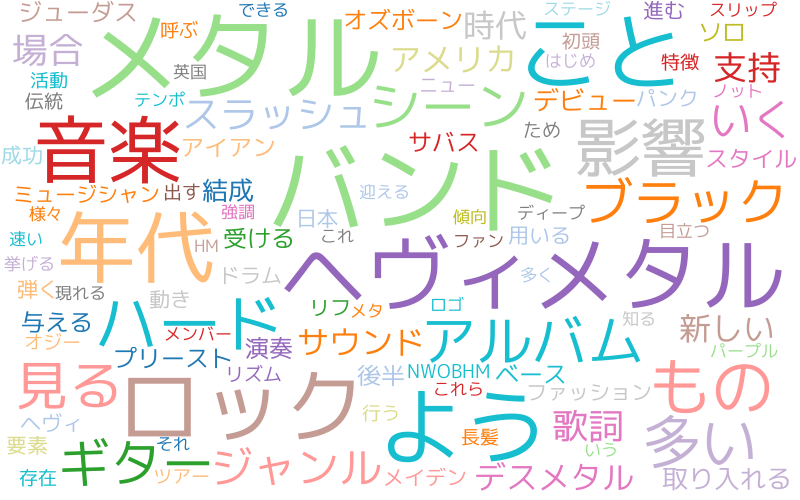

In [ ]:
#@title Word Cloud表示（nlpot）
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
#    stopwords=stopwords,
)

In [ ]:
#@title Word Distribution表示（単語数の分布）
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [ ]:
#@title Build Graph（共起ネットワーク）表示
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(min_edge_frequency=1,
                #stopwords=stopwords,
                )

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)

node_size:303, edge_size:1067


,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,S,0,1,0.000000,0.000000,0
1,誕生,1,1,0.000000,0.000000,1
2,シャロン,2,3,0.000000,1.000000,2
3,/,3,11,0.041737,0.490909,0
4,共和党,4,2,0.000000,1.000000,2


(303, 6)

,source,target,edge_frequency,source_code,target_code
0,ハード,ロック,14,282,226
1,バンド,メタル,12,287,166
2,よう,メタル,10,64,166
3,よう,バンド,9,64,287
4,ヘヴィメタル,年代,9,117,151


(1067, 5)

In [ ]:
#@title Sunburst表示
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    #save=True
)

# **Word Cloud**
- ワードクラウドは、文章中で出現頻度が高い語を複数選び出し、その頻度に応じた大きさで図示する手法。
- 表示するワードクラウドは全3種。①ワード出現回数ベース／②TF-IDFベース（全データ）/③TF-IDFベース（センテンス）\
※語の表示数はmax_words, Word Cloudの表示サイズはwidth, heightで設定できる

## **TF-IDF**
- TF-IDF は文書に含まれる単語がどれだけ重要かを示す手法の一つで、TF (= Term Frequency: 単語の出現頻度)と IDF (Inverse Document Frequency: 逆文書類度)の2つを使って計算します。

\begin{eqnarray} TF(d,w) &=& \frac{文書d における語wの出現回数}{文書d における全語の出現回数の和}\\ IDF(w) &=& log(\frac{全文書数}{語w を含む文書数})\\ TFIDF(d,w) &=& TF(d,w) \times IDF(w) \end{eqnarray}

- センテンス毎にTF-IDFを算出、センテンス×wordマトリクスをcsv出力(tfidf.csv)
- 文書全体でTF-IDFを算出したWord cloudを描画
- [**参考**] 指定センテンスのWord cloud描画も可能（Defaultは非表示、センテンスは任意指定）

In [ ]:
#@title TF-IDFマトリクス作成＆データフレーム格納
# ライブラリインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFのベクトル処理
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df_text['words'])

# TF-IDF値を「センテンス×ワード」マトリクスをデータフレーム化
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_text['words'])
display(df_tfidf)

,10,11,12,13,14,15,16,17,18,19,1960,1961,1968,1969,1970,1976,1977,1978,1980,1990,1991,1992,1993,20,2000,21,22,2200,23,24,25,2627,28,29,30,31,32,33,34,35,...,過程,違う,適応,重い,重き,重厚,重圧,重要,重視,金切り声,金属,長時間,長調,長髪,開催,開始,降らせる,限り,隆盛,集める,集団,雑誌,電子,靖国神社,音域,音楽,風味,飛ばす,駆け抜ける,驚愕,高い,高速,高音,高齢,魅せる,魔法使い,麻薬,黄金,黒い,黒人
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ハード ロック / ヘヴィメタル 70 年代 半ば ごろ アリーナ ロック 産業 ロック 的 バンド アルバム 志向 ヘヴィメタル・バンド 分かれる 傾向 見る 時代 新しい したがう シーン 細分 化 進む くる,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
シーン 細分 化 ヘヴィメタル 様々 サブ ジャンル 持つ よう,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ジャンル 分類 バンド サウンド ハード ロック 5 同様 エレクトリック ギター ファズ ディストーション 強調 ラウド もの の 基本,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ヘヴィメタル 用語 自体 70 年 前半 存在 ハード ロック 70 年代 前半 ピーク 迎える 後 パンク ロック 性急 感 加える 存続 ジャンル,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ハード ロック ヘヴィメタル 間 厳密 境界 線 無い ハード ロック ヘヴィメタル 一 括る HR / HM HM / HR 呼ぶ こと,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
シャロン オズボーン 動き 注目 これら ベテラン バンド 新しい バンド 新旧 問う 多数 参加 オズフェスト 毎年 開催 イベント 育てる,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
音楽 業界 結成 ブーム 到来 こと 多く ベテラン バンド 結成,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
モトリー・クルー ヨーロッパ ホワイトスネイク 結成 ツアー 成功 収める,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#@title TF-IDFマトリクスをcsv出力（ローカルファイルに出力する場合はfiles.downloadの#外す）
from google.colab import files
df_tfidf.to_csv('tfidf.csv',encoding='utf_8_sig')
#files.download('tfidf.csv') 

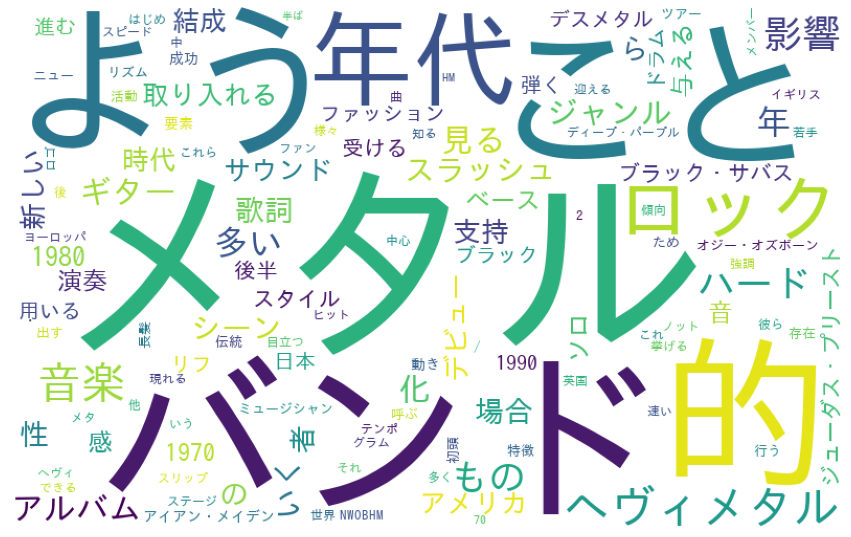

In [ ]:
#@title Word Cloud by word_count（All Data）：🔲型 → #maskの#外すと🍩型に

#wordcloud取込用にresultを辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
from wordcloud import WordCloud

#画像データダウンロード（biwakoの画像リンクもあり。変更する場合は#調整）
import requests

url = "https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png"
#url = "https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png"

file_name = "donuts.png"
#file_name = "biwa.png"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as f:
    f.write(image)

#ライブラリインポート
from PIL import Image
import numpy as np

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
custom_mask = np.array(Image.open('donuts.png'))
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).fit_words(dic_result)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

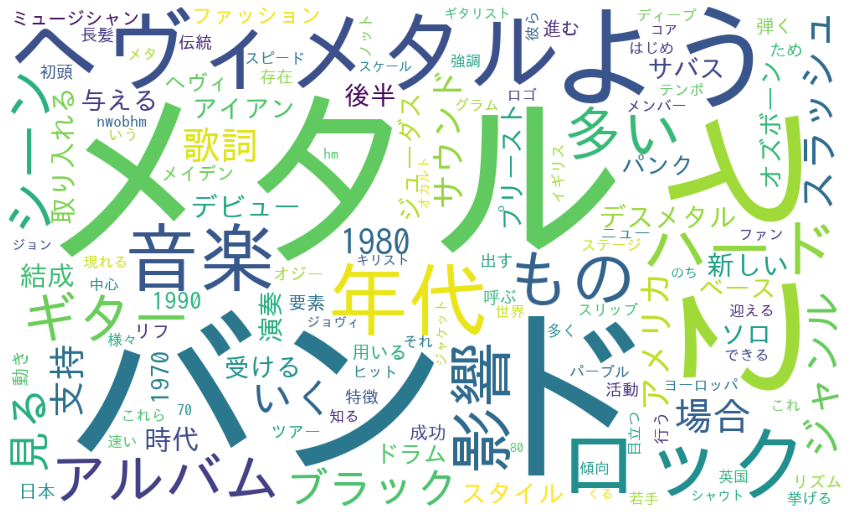

In [ ]:
#@title 全文書TF-IDF計算＆Word Cloud（TF-IDF）表示
# TF-IDF計算
tfidf_vec2 = vectorizer.fit_transform(df).toarray()[0]
# TF-IDFを辞書化
tfidf_dict2 = dict(zip(vectorizer.get_feature_names(), tfidf_vec2))
# 値が正のkeyだけ残す
tfidf_dict2 = {k: v for k, v in tfidf_dict2.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict2)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#@title 指定センテンスのTF-IDF計算＆Word Cloud表示
tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
#plt.figure(figsize=(15,10))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

※参考：このWord Cloudは指定センテンスの語のみを対象としたもの\
※表示する場合は #を外して実行\
※tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0] ←センテンスはこの数値で指定\
※語の表示数はmax_words, Word Cloudの表示サイズはwidth, heightで設定できる

**クラスタリング（k-means法）について**\
数値化（TF-IDF）したセンテンスデータのクラスタリングを行います。クラスタリングは、scikit-learn の KMeans（非階層的クラスタ分析）を使用します。KMeans（非階層的クラスタリング）では、設定したクラスタ数にしたがって、近い属性のデータをグループ化します。\
参考として適性なクラスター数を導く手法（エルボー法）の結果を表示します。横軸：クラスタ数、縦軸：SSE（残差平方和）としたグラフで、クラスタ数を増やしてもSSEがほとんど改善しない点のクラスタ数を選ぶというものです。\
適切な点が見いだせない場合も含め、クラスター数は任意に設定できるようにしています。**「クラスター数設定」**で設定します。

In [ ]:
#@title 参考：k-means_クラスター数確認_エルボー法（実行する場合は'''外す）
from sklearn.cluster import KMeans
import japanize_matplotlib

'''
sse = []
for i  in range(1, len(df_text.index)):                
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(tfidf)                         
    inertia_= np.round(km.inertia_,3) 
    sse.append(inertia_)  
    
plt.plot(range(1, len(df_text.index)),sse,marker='o')
plt.xlabel('クラスタ数')
plt.ylabel('誤差')
plt.show()
'''

"\nsse = []\nfor i  in range(1, len(df_text.index)):                \n    km = KMeans(n_clusters=i,\n                init='k-means++',     \n                n_init=10,\n                max_iter=300,\n                random_state=0)\n    km.fit(tfidf)                         \n    inertia_= np.round(km.inertia_,3) \n    sse.append(inertia_)  \n    \nplt.plot(range(1, len(df_text.index)),sse,marker='o')\nplt.xlabel('クラスタ数')\nplt.ylabel('誤差')\nplt.show()\n"

In [ ]:
#@title クラスター数設定 { run: "auto" }
num_clusters = 8 #@param {type:"number"}

In [ ]:
#@title TF-IDF_k-meansによる各センテンスのクラス分け
# kmean_clustring
from sklearn.cluster import KMeans

# クラスタ数8で実行
clusters = KMeans(n_clusters=num_clusters).fit_predict(tfidf)

#データフレームにclusterを反映
df_text['cluster_tfidf'] = clusters
df_text

,text,words,words2,cluster_tfidf,cluster_d2v
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...,ハード ロック / ヘヴィメタル 70 年代 半ば ごろ アリーナ ロック 産業 ロック 的...,"[ハード, ロック, /, ヘヴィメタル, 70, 年代, 半ば, ごろ, アリーナ, ロッ...",1,5
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった,シーン 細分 化 ヘヴィメタル 様々 サブ ジャンル 持つ よう,"[シーン, 細分, 化, ヘヴィメタル, 様々, サブ, ジャンル, 持つ, よう]",1,6
2,このジャンルに分類されるバンドのサウンドはハードロック5同様、エレクトリック・ギターのファズ...,ジャンル 分類 バンド サウンド ハード ロック 5 同様 エレクトリック ギター ファズ ...,"[ジャンル, 分類, バンド, サウンド, ハード, ロック, 5, 同様, エレクトリック...",1,6
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...,ヘヴィメタル 用語 自体 70 年 前半 存在 ハード ロック 70 年代 前半 ピーク 迎...,"[ヘヴィメタル, 用語, 自体, 70, 年, 前半, 存在, ハード, ロック, 70, ...",1,5
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...,ハード ロック ヘヴィメタル 間 厳密 境界 線 無い ハード ロック ヘヴィメタル 一 括...,"[ハード, ロック, ヘヴィメタル, 間, 厳密, 境界, 線, 無い, ハード, ロック,...",1,6
...,...,...,...,...,...
138,シャロン・オズボーンもまたこうした動きに注目し、これらのベテラン・バンドと新しいバンドが新旧...,シャロン オズボーン 動き 注目 これら ベテラン バンド 新しい バンド 新旧 問う 多数...,"[シャロン, オズボーン, 動き, 注目, これら, ベテラン, バンド, 新しい, バンド...",0,8
139,音楽業界に「再結成ブーム」が到来したこともあり、多くのベテランバンドも再結成した,音楽 業界 結成 ブーム 到来 こと 多く ベテラン バンド 結成,"[音楽, 業界, 結成, ブーム, 到来, こと, 多く, ベテラン, バンド, 結成]",3,8
140,特にモトリー・クルーやヨーロッパ、ホワイトスネイクなどは再結成ツアーが成功を収めた,モトリー・クルー ヨーロッパ ホワイトスネイク 結成 ツアー 成功 収める,"[モトリー・クルー, ヨーロッパ, ホワイトスネイク, 結成, ツアー, 成功, 収める]",3,3
141,ジャパニーズ・メタルにおいてもラウドネスがオリジナルメンバーに戻ったり、アースシェイカーやA...,ジャパニーズ メタル ラウドネス オリジナル メンバー 戻る アースシェイカー ANTHEM...,"[ジャパニーズ, メタル, ラウドネス, オリジナル, メンバー, 戻る, アースシェイカー...",3,8


# **Doc2Vec**

In [ ]:
#@title Doc2Vec 学習済モデル保存先指定
#GoogleDriveへのアクセス
from google.colab import drive
drive.mount('/content/drive')

#学習済モデル保存フォルダ指定
%cd /content/drive/My Drive/NLP

Mounted at /content/drive
/content/drive/My Drive/NLP


In [ ]:
#@title Doc2Vec ベクトル化

m = MeCab.Tagger("-Ochasen")

def mecab_sep(text):
    node = m.parseToNode(text)

    words_list = []

    while node:
        if node.feature.split(",")[0] == "名詞":
            words_list.append(node.surface)
        elif node.feature.split(",")[0] == "動詞":
            words_list.append(node.feature.split(",")[6])
        elif node.feature.split(",")[0] == "形容詞":
            words_list.append(node.feature.split(",")[6])
            
        node = node.next
        
    return words_list

### Bag-of-words / tf-idf
def calc_vecs(docs):
    vectorizer = TfidfVectorizer(analyzer=mecab_sep)
    vecs = vectorizer.fit_transform(docs)
    return vecs.toarray()

### Doc2Vec
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load("jawiki.doc2vec.dbow300d/jawiki.doc2vec.dbow300d.model")
def calc_vecs_d2v(docs):
    vecs = []
    for d in docs:
        vecs.append(model.infer_vector(mecab_sep(d)))
    return vecs

all_docs_vecs = calc_vecs_d2v(df_text['text'])

In [ ]:
#@title Doc2Vec_k-meansによる各意見のクラス分け
from sklearn.cluster import KMeans

vec = KMeans(n_clusters=num_clusters)
vec.fit(all_docs_vecs)

df_text["cluster_d2v"] = vec.labels_
df_text

,text,words,words2,cluster_tfidf,cluster_d2v
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...,ハード ロック / ヘヴィメタル 70 年代 半ば ごろ アリーナ ロック 産業 ロック 的...,"[ハード, ロック, /, ヘヴィメタル, 70, 年代, 半ば, ごろ, アリーナ, ロッ...",1,5
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった,シーン 細分 化 ヘヴィメタル 様々 サブ ジャンル 持つ よう,"[シーン, 細分, 化, ヘヴィメタル, 様々, サブ, ジャンル, 持つ, よう]",2,6
2,このジャンルに分類されるバンドのサウンドはハードロック5同様、エレクトリック・ギターのファズ...,ジャンル 分類 バンド サウンド ハード ロック 5 同様 エレクトリック ギター ファズ ...,"[ジャンル, 分類, バンド, サウンド, ハード, ロック, 5, 同様, エレクトリック...",1,6
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...,ヘヴィメタル 用語 自体 70 年 前半 存在 ハード ロック 70 年代 前半 ピーク 迎...,"[ヘヴィメタル, 用語, 自体, 70, 年, 前半, 存在, ハード, ロック, 70, ...",1,5
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...,ハード ロック ヘヴィメタル 間 厳密 境界 線 無い ハード ロック ヘヴィメタル 一 括...,"[ハード, ロック, ヘヴィメタル, 間, 厳密, 境界, 線, 無い, ハード, ロック,...",1,6
...,...,...,...,...,...
138,シャロン・オズボーンもまたこうした動きに注目し、これらのベテラン・バンドと新しいバンドが新旧...,シャロン オズボーン 動き 注目 これら ベテラン バンド 新しい バンド 新旧 問う 多数...,"[シャロン, オズボーン, 動き, 注目, これら, ベテラン, バンド, 新しい, バンド...",5,8
139,音楽業界に「再結成ブーム」が到来したこともあり、多くのベテランバンドも再結成した,音楽 業界 結成 ブーム 到来 こと 多く ベテラン バンド 結成,"[音楽, 業界, 結成, ブーム, 到来, こと, 多く, ベテラン, バンド, 結成]",4,8
140,特にモトリー・クルーやヨーロッパ、ホワイトスネイクなどは再結成ツアーが成功を収めた,モトリー・クルー ヨーロッパ ホワイトスネイク 結成 ツアー 成功 収める,"[モトリー・クルー, ヨーロッパ, ホワイトスネイク, 結成, ツアー, 成功, 収める]",5,3
141,ジャパニーズ・メタルにおいてもラウドネスがオリジナルメンバーに戻ったり、アースシェイカーやA...,ジャパニーズ メタル ラウドネス オリジナル メンバー 戻る アースシェイカー ANTHEM...,"[ジャパニーズ, メタル, ラウドネス, オリジナル, メンバー, 戻る, アースシェイカー...",1,8


In [ ]:
#@title データフレームをcsvに変換し、ローカルファイルに保存
from google.colab import files
filename =  'cluster.csv'
df.to_csv(filename, encoding = 'utf-8-sig') 
files.download(filename)

# **参考サイト**
- [**【データ分析実践】口コミを使ったキャンプ場に関する分析3 ~ Word2Vec編 ~**](https://data-analytics.fun/2020/03/12/word2vec/)

- [**Janomeで TF-IDF をやってみた**](https://zenn.dev/megane_otoko/articles/013_tf_idf_trial)

- [**ニュース記事をword2vecでベクトル化して可視化するレシピ**](https://axross-recipe.com/recipes/34)

- [**自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開**](https://www.takapy.work/entry/2020/05/17/192947)

- [**NLPLOTが凄い！自然言語を可視化・分析できるPYTHONライブラリ**](https://boxcode.jp/nlplot%E3%81%8C%E5%87%84%E3%81%84%EF%BC%81%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%83%BB%E5%88%86%E6%9E%90%E3%81%A7%E3%81%8D%E3%82%8Bpython%E3%83%A9%E3%82%A4)

- [**PYTHONで感情分析（形態素解析準備編）- MECAB**](https://boxcode.jp/python%e3%81%a7%e6%84%9f%e6%83%85%e5%88%86%e6%9e%90%ef%bc%88%e5%bd%a2%e6%85%8b%e7%b4%a0%e8%a7%a3%e6%9e%90%e6%ba%96%e5%82%99%e7%b7%a8%ef%bc%89-mecab)

- [**ポルカドットスティングレイの歌詞データをPythonで機械学習、分析してみた -word2vec‐**](https://www.cloudnotes.tech/entry/polka_word2vec)

- [**word2vecを使ったk-means分類を行う**](https://dailytextmining.hatenablog.com/entry/2018/08/12/231051)

- [**テキストをK-meansクラスタリングしてみよう**](https://www.youtube.com/watch?v=cU2RmYaR44I)

- [**【機械学習-クラスタリング】k-meansを用いたクラスタリングのクラスター数の決め方〜エルボー法〜**](https://kgt-blog.com/tech-20/2433/)

- [**ユーザのTweet傾向をクラスタ分析するレシピ**](https://axross-recipe.com/recipes/5)